In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import pickle as pk

DECOUVERTE DU DATASET \\
AVRIL

In [2]:
df_apr = pd.read_csv('uber-raw-data-apr14.csv')

In [3]:
df_apr.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [4]:
df_apr.describe()

,Lat,Lon
count,564516.000000,564516.000000
mean,40.740005,-73.976817
std,0.036083,0.050426
min,40.072900,-74.773300
25%,40.722500,-73.997700
50%,40.742500,-73.984800
75%,40.760700,-73.970000
max,42.116600,-72.066600


modification du titre de la colonne

In [5]:
df_apr.columns = [x.lower().replace('/', '_') for x in df_apr.columns]

In [6]:
df_apr.head()

,date_time,lat,lon,base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


Modif dataframe en object pandas datetime

In [7]:
df_apr.date_time = pd.to_datetime(df_apr['date_time'])

Séparation date et heure

In [8]:
new_dates, new_times = zip(*[(d.date(), d.time()) for d in df_apr['date_time']])
df_apr = df_apr.assign(new_date=new_dates, new_time=new_times)

Ajout d'une ligne heure pour améliorer la visualisation

In [9]:
df_apr['hour'] = df_apr.date_time.dt.hour

Ajout d'une ligne jour de la semaine pour améliorer la visualisation

In [10]:
df_apr['day'] = df_apr.date_time.dt.dayofweek

In [11]:
df_apr.head()

,date_time,lat,lon,base,new_date,new_time,hour,day
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01,00:11:00,0,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01,00:17:00,0,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01,00:21:00,0,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01,00:28:00,0,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01,00:33:00,0,1


<AxesSubplot:title={'center':'Trafic par jour en avril'}, xlabel='new_date'>

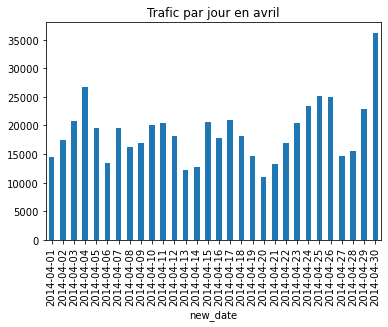

In [12]:
df_apr.groupby(['new_date']).size().plot( kind='bar', title='Trafic par jour en avril')

<AxesSubplot:title={'center':'Trafic par heure en avril'}, xlabel='hour'>

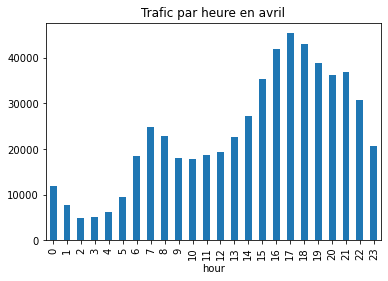

In [13]:
df_apr.groupby(['hour']).size().plot( kind='bar',title='Trafic par heure en avril')

<AxesSubplot:title={'center':'Trafic par jour de la semaine avril'}, xlabel='day'>

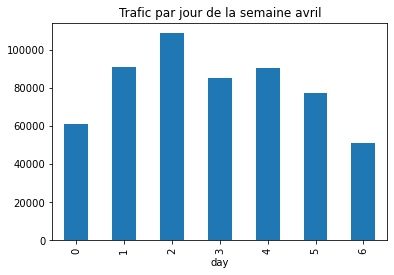

In [14]:
df_apr.groupby(['day']).size().plot( kind='bar', title='Trafic par jour de la semaine avril')

AOUT

In [15]:
df_aug = pd.read_csv('uber-raw-data-aug14.csv')

In [16]:
df_aug.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [17]:
df_aug.describe()

,Lat,Lon
count,829275.000000,829275.000000
mean,40.737781,-73.970160
std,0.043628,0.061483
min,39.656900,-74.773700
25%,40.719000,-73.995800
50%,40.740700,-73.982600
75%,40.760500,-73.961200
max,41.318200,-72.335900


In [18]:
df_aug.columns = [x.lower().replace('/', '_') for x in df_aug.columns]

In [19]:
df_aug.date_time = pd.to_datetime(df_aug['date_time'])

In [20]:
new_dates, new_times = zip(*[(d.date(), d.time()) for d in df_aug['date_time']])
df_aug = df_aug.assign(new_date=new_dates, new_time=new_times)

In [21]:
df_aug['hour'] = df_aug.date_time.dt.hour
df_aug['day'] = df_aug.date_time.dt.dayofweek

In [22]:
df_aug.head()

,date_time,lat,lon,base,new_date,new_time,hour,day
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512,2014-08-01,00:03:00,0,4
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512,2014-08-01,00:09:00,0,4
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512,2014-08-01,00:12:00,0,4
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512,2014-08-01,00:12:00,0,4
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512,2014-08-01,00:12:00,0,4


<AxesSubplot:title={'center':'Trafic par jour en aout'}, xlabel='new_date'>

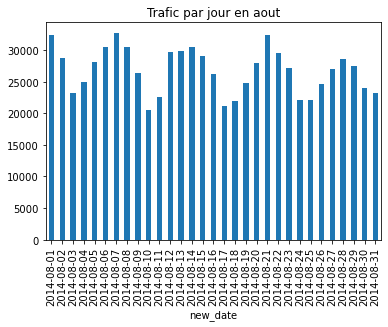

In [23]:
df_aug.groupby(['new_date']).size().plot( kind='bar', title='Trafic par jour en aout')

<AxesSubplot:xlabel='hour'>

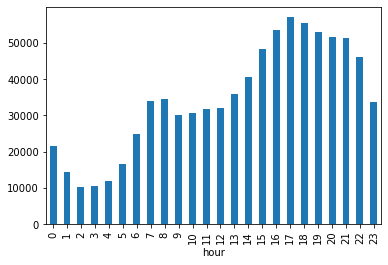

In [24]:
df_aug.groupby(['hour']).size().plot( kind='bar')

<AxesSubplot:title={'center':'Trafic par jour de la semaine aout'}, xlabel='day'>

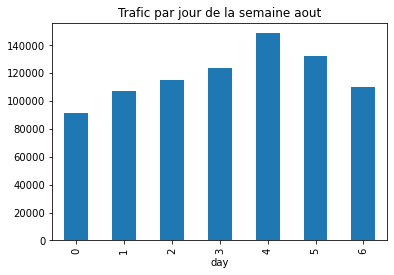

In [25]:
df_aug.groupby(['day']).size().plot( kind='bar', title='Trafic par jour de la semaine aout')

JUILLET

In [26]:
df_jul = pd.read_csv('uber-raw-data-jul14.csv')

In [27]:
df_jul.columns = [x.lower().replace('/', '_') for x in df_jul.columns]

In [28]:
df_jul.date_time = pd.to_datetime(df_jul['date_time'])

In [29]:
new_dates, new_times = zip(*[(d.date(), d.time()) for d in df_jul['date_time']])
df_jul = df_jul.assign(new_date=new_dates, new_time=new_times)
df_jul['hour'] = df_jul.date_time.dt.hour
df_jul['day'] = df_jul.date_time.dt.dayofweek

<AxesSubplot:title={'center':'Trafic par jour en juillet'}, xlabel='new_date'>

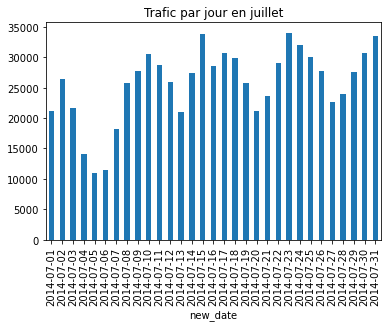

In [30]:
df_jul.groupby(['new_date']).size().plot( kind='bar', title='Trafic par jour en juillet')

<AxesSubplot:xlabel='hour'>

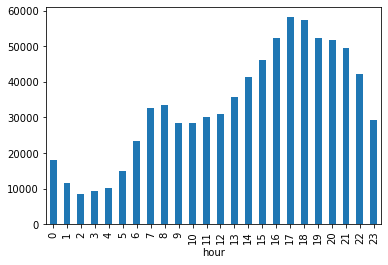

In [31]:
df_jul.groupby(['hour']).size().plot( kind='bar')

<AxesSubplot:title={'center':'Trafic par jour de la semaine juillet'}, xlabel='day'>

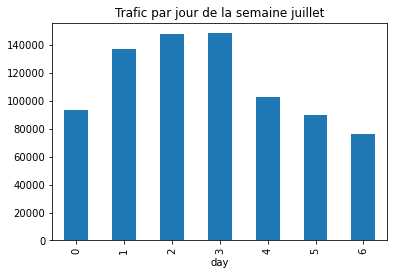

In [32]:
df_jul.groupby(['day']).size().plot( kind='bar', title='Trafic par jour de la semaine juillet')

JUIN

In [33]:
df_jun = pd.read_csv('uber-raw-data-jun14.csv')

In [34]:
df_jun.columns = [x.lower().replace('/', '_') for x in df_jun.columns]

In [35]:
df_jun.date_time = pd.to_datetime(df_jun['date_time'])

In [36]:
new_dates, new_times = zip(*[(d.date(), d.time()) for d in df_jun['date_time']])
df_jun = df_jun.assign(new_date=new_dates, new_time=new_times)
df_jun['hour'] = df_jun.date_time.dt.hour
df_jun['day'] = df_jun.date_time.dt.dayofweek

<AxesSubplot:title={'center':'Trafic par jour en juin'}, xlabel='new_date'>

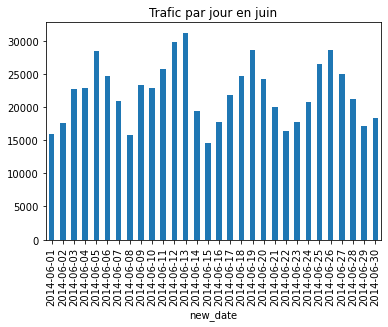

In [37]:
df_jun.groupby(['new_date']).size().plot( kind='bar', title='Trafic par jour en juin')

<AxesSubplot:xlabel='hour'>

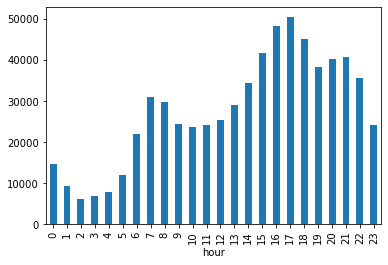

In [38]:
df_jun.groupby(['hour']).size().plot( kind='bar')

<AxesSubplot:title={'center':'Trafic par jour de la semaine juin'}, xlabel='day'>

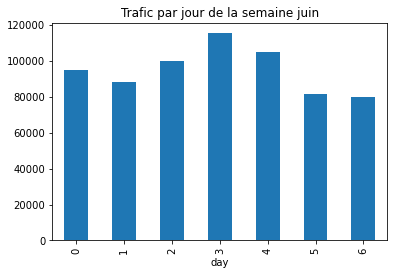

In [39]:
df_jun.groupby(['day']).size().plot( kind='bar', title='Trafic par jour de la semaine juin')

MAI

In [40]:
df_may = pd.read_csv('uber-raw-data-may14.csv')

In [41]:
df_may.columns = [x.lower().replace('/', '_') for x in df_may.columns]

In [42]:
df_may.date_time = pd.to_datetime(df_may['date_time'])

In [43]:
new_dates, new_times = zip(*[(d.date(), d.time()) for d in df_may['date_time']])
df_may = df_may.assign(new_date=new_dates, new_time=new_times)
df_may['hour'] = df_may.date_time.dt.hour
df_may['day'] = df_may.date_time.dt.dayofweek

<AxesSubplot:title={'center':'Trafic par jour en mai'}, xlabel='new_date'>

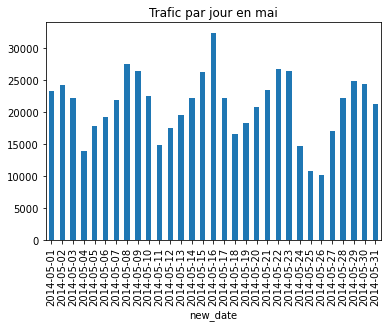

In [44]:
df_may.groupby(['new_date']).size().plot( kind='bar', title='Trafic par jour en mai')

<AxesSubplot:xlabel='hour'>

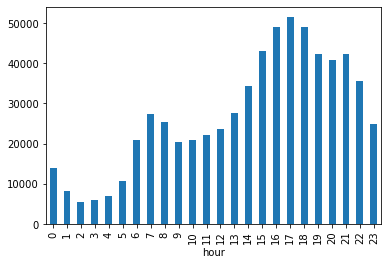

In [45]:
df_may.groupby(['hour']).size().plot( kind='bar')

<AxesSubplot:title={'center':'Trafic par jour de la semaine mai'}, xlabel='day'>

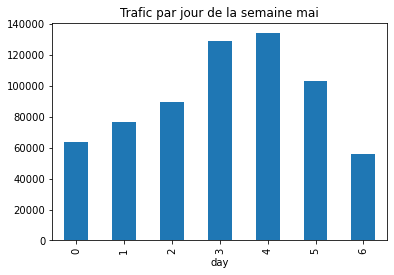

In [46]:
df_may.groupby(['day']).size().plot( kind='bar', title='Trafic par jour de la semaine mai')

SEPTEMBRE

In [47]:
df_sep = pd.read_csv('uber-raw-data-sep14.csv')

In [48]:
df_sep.columns = [x.lower().replace('/', '_') for x in df_sep.columns]

In [49]:
df_sep.date_time = pd.to_datetime(df_sep['date_time'])

In [50]:
new_dates, new_times = zip(*[(d.date(), d.time()) for d in df_sep['date_time']])
df_sep = df_sep.assign(new_date=new_dates, new_time=new_times)
df_sep['hour'] = df_sep.date_time.dt.hour
df_sep['day'] = df_sep.date_time.dt.dayofweek

<AxesSubplot:title={'center':'Trafic par jour en septembre'}, xlabel='new_date'>

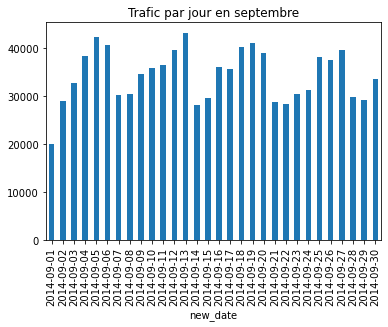

In [51]:
df_sep.groupby(['new_date']).size().plot( kind='bar', title='Trafic par jour en septembre')

<AxesSubplot:xlabel='hour'>

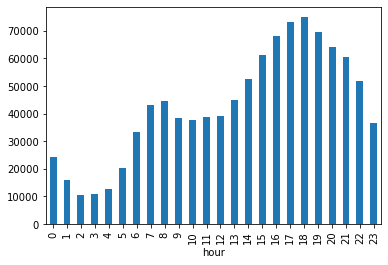

In [52]:
df_sep.groupby(['hour']).size().plot( kind='bar')

<AxesSubplot:title={'center':'Trafic par jour de la semaine septembre'}, xlabel='day'>

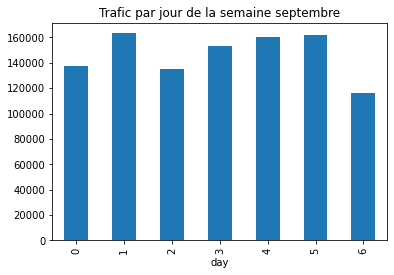

In [53]:
df_sep.groupby(['day']).size().plot( kind='bar', title='Trafic par jour de la semaine septembre')

CONCATENATION DES DATAFRAMES ET SUPPRESSION DES COLONNES QUI NE SERVENT PAS DANS LE MODELE ML

In [54]:
df_def = pd.concat([df_apr, df_aug, df_jul, df_jun, df_may, df_sep])


In [55]:
df_def.head()

,date_time,lat,lon,base,new_date,new_time,hour,day
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01,00:11:00,0,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01,00:17:00,0,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01,00:21:00,0,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01,00:28:00,0,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01,00:33:00,0,1


In [56]:
df_def_2 = df_def.drop(columns=["date_time"])

In [57]:
df_def_2.head()

,lat,lon,base,new_date,new_time,hour,day
0,40.7690,-73.9549,B02512,2014-04-01,00:11:00,0,1
1,40.7267,-74.0345,B02512,2014-04-01,00:17:00,0,1
2,40.7316,-73.9873,B02512,2014-04-01,00:21:00,0,1
3,40.7588,-73.9776,B02512,2014-04-01,00:28:00,0,1
4,40.7594,-73.9722,B02512,2014-04-01,00:33:00,0,1


In [58]:
df_def_2.isnull().any()

lat         False
lon         False
base        False
new_date    False
new_time    False
hour        False
day         False
dtype: bool

In [59]:
df_def_2

,lat,lon,base,new_date,new_time,hour,day
0,40.7690,-73.9549,B02512,2014-04-01,00:11:00,0,1
1,40.7267,-74.0345,B02512,2014-04-01,00:17:00,0,1
2,40.7316,-73.9873,B02512,2014-04-01,00:21:00,0,1
3,40.7588,-73.9776,B02512,2014-04-01,00:28:00,0,1
4,40.7594,-73.9722,B02512,2014-04-01,00:33:00,0,1
...,...,...,...,...,...,...,...
1028131,40.7668,-73.9845,B02764,2014-09-30,22:57:00,22,1
1028132,40.6911,-74.1773,B02764,2014-09-30,22:57:00,22,1
1028133,40.8519,-73.9319,B02764,2014-09-30,22:58:00,22,1
1028134,40.7081,-74.0066,B02764,2014-09-30,22:58:00,22,1


In [60]:
df_def_2.to_csv('df_def_2.csv')